In [7]:
!pip install TextBlob

     |████████████████████████████████| 636 kB 8.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/swethapola/anaconda3/bin/python -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as m
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import itertools
import seaborn as sn
from textblob import TextBlob
%matplotlib inline
import nltk
from nltk.stem import *
import re 
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans as KMeans

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/swethapola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/swethapola/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
def preprocessor(data):
    
    # TfidfVectorizer puts all letters in lowercase by default
    data = data.lower()

    # sub hyphens with no space
    data = re.sub("\-", '', data)
    
    # sub non letter & non digit characters w/ a space
    data = re.sub("[^A-Za-z0-9 \\n]","", data)
    
    # sub digit characters with '#' character
    #data = re.sub("[\d]", "\#", data) 
    
    #removing stop words
    word_tokens = word_tokenize(data)
    sw = stopwords.words("english")
    filtered_sentence = []
    for w in word_tokens: 
        if w not in sw: 
            filtered_sentence.append(w) 
    
    #turn list of tokens back into str
    data = ' '.join(filtered_sentence)
    
    # shorten long words of length 20 or more
    #data = re.sub('(\w{20})\w+', '\\1', data) #mainly gets rid of hyperlinks
    
    
    # stemming words
    #stem = PorterStemmer()
    #for word in data:
     #   data = data.replace(word, stem.stem(word))
    
    return data

In [53]:
def tvect(data):
    vect = TfidfVectorizer(min_df = 2, ngram_range = (2,4))
    fitted = vect.fit_transform(data)
    return fitted, vect.get_feature_names()

def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [54]:
def featurize(csv, path):
    #read in csv & make a df
    df = pd.read_csv(path + csv)
    df = df.drop("Unnamed: 0", axis = 1)


    df = df.rename(columns={'0': 'text'})
    
    #add polarity column
    df['polarity'] = df['text'].apply(get_polarity)
    
    #add preprocessed column
    df['preprocess_full_text'] = df.text.apply(lambda x: preprocessor(x))
    
    #add feature names from TfidfVectorizer
    featurized = tvect(df.preprocess_full_text)
    df1 = pd.DataFrame(featurized[0].toarray(), columns=featurized[1])
    df = pd.concat([df, df1], axis=1)
    
    
    return df, featurized[1]


In [55]:
w = featurize('AskWomen_Data.csv' , 'data/')
w_df = w[0]
w_features = w[1]

In [56]:
m = featurize('AskMen_Data.csv' , 'data/')
m_df = m[0]
m_features = m[1]

In [57]:
w_df["outcome"] = 1
m_df["outcome"] = 0

In [58]:
w_df.head()

,text,polarity,preprocess_full_text,10 hours,10 minutes,10 minutes without,10 minutes without rest,10 yawned,10 yawned walked,10 yawned walked slowly,...,youve stopped altogether,youve stopped altogether week,youve together,youve wasted,youve wasted time,youve wasted time always,zero woman,zero woman uses,zero woman uses condoms,outcome
0,My dad had a heart attack and spent over 7 min...,0.038258,dad heart attack spent 7 minutes without oxyge...,0.317523,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,I had dangerous open heart surgery due to mult...,-0.072619,dangerous open heart surgery due multiple cong...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,"In June of 2020, my Dad collapsed in our yard ...",0.054932,june 2020 dad collapsed yard helping us mow la...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,"after my twin aunts were born, my grandma beca...",0.145833,twin aunts born grandma became severely ill cl...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Not me but my mother is the most severe case I...,-0.192593,mother severe case think around 25 started reg...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [59]:
df_nn = pd.concat([w_df[["preprocess_full_text", "outcome"]], m_df[["preprocess_full_text", "outcome"]]])
df_nn.to_csv("data/NN_Data.csv")

# PCA AND CLUSTERING

In [20]:
intersection = set(w_features).intersection(set(m_features))

len(intersection)


1776

In [21]:
len(w_features)

20606

In [22]:
len(m_features)

15958

In [ ]:
intersection

In [41]:
# build the full df for clustering
full_df = pd.concat([w_df, m_df])
df = full_df.drop(columns = ['text', 'preprocess_full_text', 'polarity'])

In [42]:
df = df.fillna(0)

In [72]:
# create an instance of the PCA class
pca = PCA(n_components=2)

# fit the data using the original X_train_std data; tranform X_train_std data
pca_df = pca.fit_transform(df)

# transform the X_test_std data
#X_test_pca_skl = pca.transform(X_test_std)

In [79]:
pca_df = pd.DataFrame(pca_df)

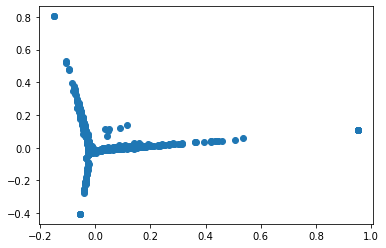

In [80]:
plt.scatter(pca_df[0], pca_df[1])

In [81]:
kmeans = KMeans(n_clusters=3, init='k-means++')

kmeans.fit(pca_df)

kmeans.labels_



array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [84]:
print(np.sum(kmeans.labels_ == 0))
print(np.sum(kmeans.labels_ == 1))
print(np.sum(kmeans.labels_ == 2))


2522
216
50


In [85]:
full_df['outcome'] = kmeans.labels_

In [89]:
main = full_df[["preprocess_full_text", "outcome"]]
#main[main["outcome"] == 1]
main

,preprocess_full_text,outcome
0,dad heart attack spent 7 minutes without oxyge...,0
1,dangerous open heart surgery due multiple cong...,0
2,june 2020 dad collapsed yard helping us mow la...,0
3,twin aunts born grandma became severely ill cl...,1
4,mother severe case think around 25 started reg...,0
...,...,...
1608,dad brother dont care long im one lugging arou...,0
1609,im throwing im worried breaking need fold fit ...,0
1610,terribly emotionally abusive mother father aro...,0
1611,hi im back relationship sex great kinda short ...,0


# LOG REG

In [30]:
full_df.head()

,text,polarity,preprocess_full_text,10 hours,10 minutes,10 minutes without,10 minutes without rest,10 yawned,10 yawned walked,10 yawned walked slowly,...,youve already rubs leg,youve made,youve made right,youve made right decision,youve meaning,youve meaning activity,youve meaning activity occupy,yr old,yrs old,outcome
0,My dad had a heart attack and spent over 7 min...,0.038258,dad heart attack spent 7 minutes without oxyge...,0.317523,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,I had dangerous open heart surgery due to mult...,-0.072619,dangerous open heart surgery due multiple cong...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"In June of 2020, my Dad collapsed in our yard ...",0.054932,june 2020 dad collapsed yard helping us mow la...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"after my twin aunts were born, my grandma beca...",0.145833,twin aunts born grandma became severely ill cl...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Not me but my mother is the most severe case I...,-0.192593,mother severe case think around 25 started reg...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [31]:
full_df = full_df.fillna(0)
X = full_df.drop(["outcome", "text", "preprocess_full_text", "polarity"], axis = 1)
y = full_df["outcome"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(pca_df), y, test_size=0.3, random_state=1, stratify=y)

In [46]:
model = linear_model.LogisticRegressionCV(max_iter = 200)

In [47]:
model.fit(X_train, y_train, sample_weight=None)

LogisticRegressionCV(max_iter=200)

In [48]:
y_pred = model.predict(X_test)

In [49]:
print('Prediction accuracy: %3.2f' % model.score(X_test, y_test))

Prediction accuracy: 0.59


In [50]:
model.coef_[0]

array([-2.68147382,  1.10442998,  0.48602549, -0.56766435, -0.18177352,
       -0.99296717, -1.76091805,  1.12203522,  0.92039781, -1.45515669])

In [51]:
pd.DataFrame(pca_df)

,0,1,2,3,4,5,6,7,8,9
0,0.125969,0.004751,0.004696,-0.001439,-0.002899,-0.011577,-0.004938,-0.013483,0.004672,-0.003819
1,-0.016716,-0.018258,-0.022118,-0.013853,-0.016187,-0.081515,0.619871,-0.058048,0.194876,0.018825
2,0.070828,0.005968,-0.002769,-0.004959,-0.005364,0.006083,0.005480,0.000843,-0.013551,-0.018124
3,-0.037776,0.111507,0.039754,0.006704,-0.000415,0.004761,-0.004175,-0.033416,-0.006016,0.001112
4,0.018759,-0.013686,-0.010929,-0.004144,-0.004695,-0.014513,-0.006224,-0.008283,0.001629,0.005308
...,...,...,...,...,...,...,...,...,...,...
2783,-0.016332,-0.015486,-0.013977,-0.008302,-0.007113,0.005307,-0.007959,-0.001232,0.006558,-0.013488
2784,-0.024802,0.019141,-0.005226,-0.007598,-0.013248,-0.018903,0.045820,0.066279,-0.084999,-0.123741
2785,-0.027948,0.021409,-0.005277,-0.010781,-0.007468,-0.073873,0.048973,0.233318,-0.063535,-0.070770
2786,-0.015186,-0.019543,-0.013022,0.005446,-0.005370,-0.004177,-0.006291,-0.009918,-0.002120,0.011934


In [309]:
coef_table = pd.DataFrame(pca_df)
coef_table.insert(len(coef_table.columns),"Coefs", model.coef_.transpose())

ValueError: Length of values (10) does not match length of index (2788)

NameError: name 'tf' is not defined

In [276]:
coef_table.sort_values("Coefs")


,0,Coefs
0,polarity,-40.884744
28465,means something,-2.235309
13054,one time,-2.218298
25925,guys feel,-2.211709
8894,hes ever,-2.206047
...,...,...
8332,heart attack,1.694961
5292,dont anything,1.722159
3464,chest pain,1.747430
27905,long go,1.955540
